# 안녕하세요:)

## AIVLE 2차 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정 0번 파일입니다.

* 본 과정에서는 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.

## [프로젝트 목적]
* 우리는 공공 데이터를 활용해 버스 수요 관련 인사이트를 도출하여 <font color='red'><b>버스 노선 또는 정류장이 더 필요한 구를 선정</b></font> 하고자 합니다.    

- 프로젝트를 진행하면서 무엇을 하고 있는지, 왜 하는지에 대해서 한번 생각 해보실 수 있는 시간이었으면 합니다.
    
- 정답이 있는 프로젝트가 아닙니다. 어떤 결과를 도출하셔도 좋습니다. 

- 처음부터 잘하는 사람은 없습니다. 부딪히면서 성장하는 기회로 삼고 본인의 페이스에 맞게 이번 미니프로젝트를 진행하시면 좋겠습니다.

## [프로젝트 흐름]


### 0. 튜토리얼에서 주민등록 데이터를 함께 전처리/체험 해 봅니다.

1. 서울시 버스 정류장 데이터를 전처리/분석 합니다.

2. 서울시 유동인구 데이터를 전처리/분석 합니다.

3. 서울시 주민등록 데이터를 전처리/분석 합니다.

4. 서울시 업종등록 데이터를 전처리/분석 합니다.

5. 위 4개 데이터를 합쳐서 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다.

#  1. 데이터 불러오기
## 모두 4개의 데이터가 주어집니다. 이중 두개는 필수로, 두개는 선택으로 사용하게 됩니다.
### 간단히 체험 해 볼 데이터는 <b>서울시 구별 주민 등록 데이터</b>입니다.

* 22년 4분기 기준 서울시 구별 주민 등록 데이터를 체험해 보겠습니다.

* rawdata 폴더에 있는 '1.0 주민등록 데이터.csv'파일을 'seoul_people' 변수에 저장하세요.
    * 데이터 파일 로딩시 참고 사항 
        * 구분자(sep)는 '\t' 입니다
        * 'cp949' 인코더를 사용해 주세요

In [83]:
# 서울시 구별 주민 등록 데이터 입니다
# https://data.seoul.go.kr/dataList/419/S/2/datasetView.do

import pandas as pd

seoul_people = pd.read_csv('rawdata/1.0 주민등록 데이터.csv',sep="\t", encoding = 'cp949')

In [84]:
seoul_people.head()

,동별(1),동별(2),소계,남자,여자,65세이상고령인
0,합계,소계,9428372,4570048,4858324,1667411
1,합계,종로구,141379,68395,72984,27958
2,합계,중구,120437,58563,61874,25055
3,합계,용산구,218650,105087,113563,39037
4,합계,성동구,281000,136633,144367,47720


In [85]:
seoul_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   동별(1)     26 non-null     object
 1   동별(2)     26 non-null     object
 2   소계        26 non-null     int64 
 3   남자        26 non-null     int64 
 4   여자        26 non-null     int64 
 5   65세이상고령인  26 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 1.3+ KB


In [86]:
seoul_people.head(30)

,동별(1),동별(2),소계,남자,여자,65세이상고령인
0,합계,소계,9428372,4570048,4858324,1667411
1,합계,종로구,141379,68395,72984,27958
2,합계,중구,120437,58563,61874,25055
3,합계,용산구,218650,105087,113563,39037
4,합계,성동구,281000,136633,144367,47720
5,합계,광진구,337416,162541,174875,54071
6,합계,동대문구,336644,165755,170889,64468
7,합계,중랑구,385318,189537,195781,74920
8,합계,성북구,430397,206961,223436,77475
9,합계,강북구,293660,142567,151093,66307


# 2. 데이터 확인하기
## 데이터의 상태를 정확히 파악한 뒤, 분석하기 용이한 형태로 전처리 해봅시다.
+ KeyPoint : 데이터를 확인하고 잘못된 자료들을 수정할 수 있다.
  * 데이터 확인
  * 관측치들의 패턴 탐색
  * 잘못된 자료들을 탐색

In [87]:
seoul_people.head()

,동별(1),동별(2),소계,남자,여자,65세이상고령인
0,합계,소계,9428372,4570048,4858324,1667411
1,합계,종로구,141379,68395,72984,27958
2,합계,중구,120437,58563,61874,25055
3,합계,용산구,218650,105087,113563,39037
4,합계,성동구,281000,136633,144367,47720


### '동별(1)' 컬럼은 필요가 없어 보입니다. 컬럼을 지워볼게요.


In [88]:
seoul_people.drop('동별(1)', axis=1, inplace=True)

In [89]:
seoul_people

,동별(2),소계,남자,여자,65세이상고령인
0,소계,9428372,4570048,4858324,1667411
1,종로구,141379,68395,72984,27958
2,중구,120437,58563,61874,25055
3,용산구,218650,105087,113563,39037
4,성동구,281000,136633,144367,47720
5,광진구,337416,162541,174875,54071
6,동대문구,336644,165755,170889,64468
7,중랑구,385318,189537,195781,74920
8,성북구,430397,206961,223436,77475
9,강북구,293660,142567,151093,66307


### '동별(2)' 컬럼이 의미하는것은 자치구입니다. 컬럼명을 자치구로 변경해볼게요.

In [90]:
seoul_people.rename(columns = {'동별(2)' : '자치구'}, inplace=True)

In [91]:
seoul_people

,자치구,소계,남자,여자,65세이상고령인
0,소계,9428372,4570048,4858324,1667411
1,종로구,141379,68395,72984,27958
2,중구,120437,58563,61874,25055
3,용산구,218650,105087,113563,39037
4,성동구,281000,136633,144367,47720
5,광진구,337416,162541,174875,54071
6,동대문구,336644,165755,170889,64468
7,중랑구,385318,189537,195781,74920
8,성북구,430397,206961,223436,77475
9,강북구,293660,142567,151093,66307


## 답이 정해져 있는 프로젝트가 아닙니다 

+ 저는 여기서 인구 합계와 남자, 여자 수만 가져가는데요, 여기서 다른 포인트를 잡아보는 것도 색다른 분석이 될 수 있습니다

+ 65세 이상 인구의 이동시 주로 이용하는 교통 수단이 뭘까요?

+ '세대당 인구'나 '등록 외국인의 수'에서 얻어낼 수 있는 인사이트가 있을까요?

In [92]:
# seoul_people = seoul_people[['자치구','남자','여자','소계']]


In [93]:
seoul_people.sort_values('소계')

,자치구,소계,남자,여자,65세이상고령인
2,중구,120437,58563,61874,25055
1,종로구,141379,68395,72984,27958
3,용산구,218650,105087,113563,39037
18,금천구,229642,115786,113856,42928
4,성동구,281000,136633,144367,47720
9,강북구,293660,142567,151093,66307
13,서대문구,306337,145816,160521,55996
10,도봉구,311694,151398,160296,66998
6,동대문구,336644,165755,170889,64468
5,광진구,337416,162541,174875,54071


# 3. 데이터 분석하기
## 최적의 모델을 만들기위해 데이터를 입체적으로 바라보는 시도는 중요합니다.
+ KeyPoint : 데이터의 형태를 살펴보고 다양한 분석기법을 통해 모델링에 적합하도록 정제요소를 선별할 수 있다.
  * 관측치들의 패턴 탐색
  * 잘못된 자료들을 탐색
  * 변수들간의 관계 파악

## 우리는 시각화를 통해서 데이터를 분석할 예정입니다.
+ 데이터 시각화(data visualization)는 데이터 분석 결과를 쉽게 이해할 수 있도록 시각적으로 표현하고 전달되는 과정을 말한다. 데이터 시각화의 목적은 도표(graph)라는 수단을 통해 정보를 명확하고 효과적으로 전달하는 것이다.(위키백과)

+ 튜토리얼에서는 따로 그리는 시간을 가지진 않습니다만 프로젝트 진행시엔 많은 시도 부탁드립니다.

In [94]:
# 시각화, 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

### Seaborn을 활용한 데이터 시각화
#### Seaborn 라이브러리는 데이터를 직관적으로 볼 수 있도록 다양한 지원을 해주고 있습니다.
#### 여기서는 Seaborn이 제공하는 통계차트 중 대표적인 몇 가지를 활용해보고자 합니다.
[참고] 공식 Document
* Seaborn(https://seaborn.pydata.org/api.html)
* Seaborn.CountChart(https://seaborn.pydata.org/generated/seaborn.countplot.html)
* Seaborn.Distplot(https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot) : 히스토그램 + 커널밀도
* Seaborn.Boxplot(https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot)
* Seaborn.Heatmap(https://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap)
* Seaborn.Pairplot(https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot) : 조합별 히스토그램 + 산점도

In [95]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_people["남자비율"] = seoul_people['남자'] / seoul_people["소계"]

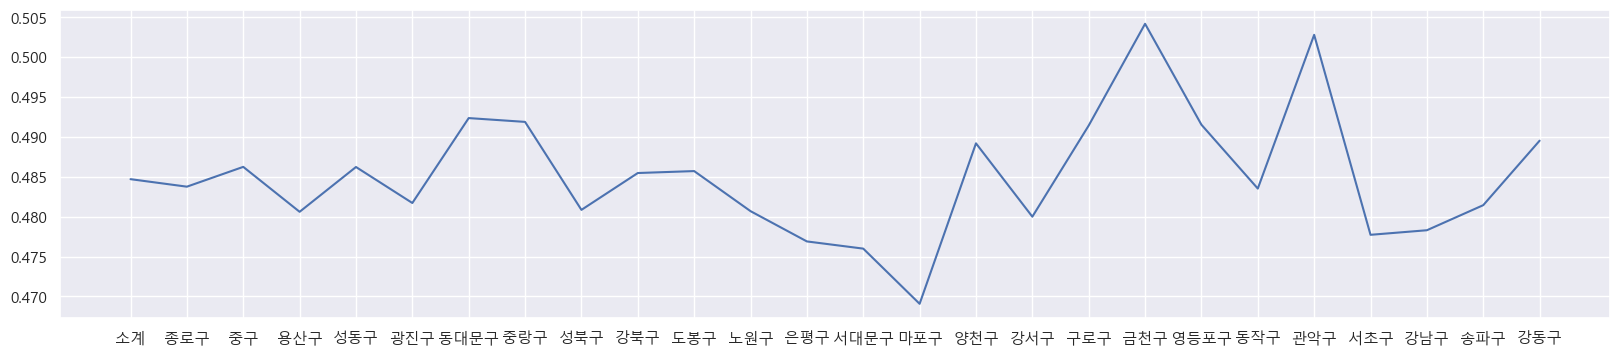

In [96]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
plt.figure(figsize=(20,4))
plt.plot('자치구', '남자비율', data = seoul_people)


<AxesSubplot:xlabel='자치구', ylabel='남자비율'>

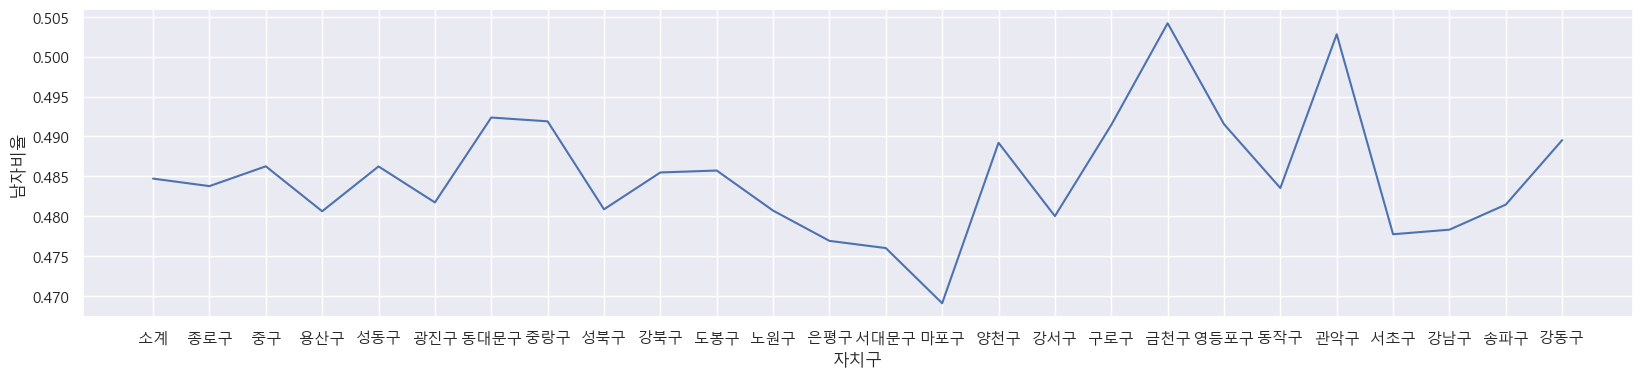

In [97]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 20,4
sns.lineplot(data = seoul_people, x= '자치구', y='남자비율')

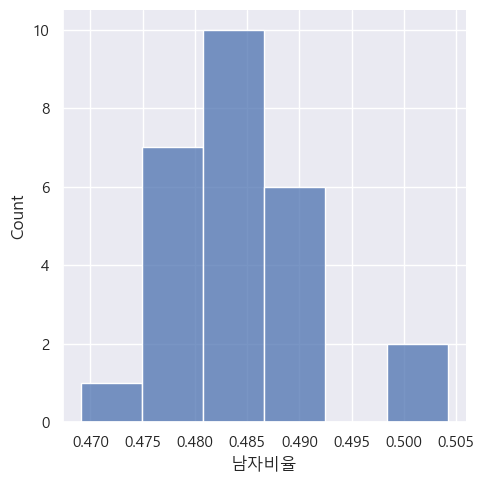

In [98]:
sns.displot(seoul_people['남자비율'])

### 상관관계 분석(Pandas/Seaborn)
#### 상관관계 분석은 왜 하는것일까요? 변수 간 관계를 들여다보기 위해서!
#### 막연하게 상관관계는 높으면 좋을 것 같습니다. 하지만 AI모델링 또는 통계분석에서 꼭 좋은 것은 아닙니다. 
+ 가령 살아온 날수와 식사를 한 끼니 수는 강한 상관관계를 가질 것입니다. 그러나 조금만 다르게 보면 둘은 같은 이야기를 하는 것이라고 할 수 있습니다.
+ 남자의 수와 합계의 관계는 매우 밀접하겠죠?

In [99]:
# 아래에 실습코드를 작성하고 상관계수를 확인합니다.
import scipy.stats as spst
spst.pearsonr(seoul_people['남자'],seoul_people['소계'])

PearsonRResult(statistic=0.9999938719385751, pvalue=1.8515506639449978e-60)

### 인사이트 도출
* 데이터 분석 결과를 토대로 인사이트를 정리해보세요.

In [100]:
# 아래에 실습코드를 작성하고 상관계수를 확인합니다.
seoul_people.corr()

,소계,남자,여자,65세이상고령인,남자비율
소계,1.000000,0.999994,0.999995,0.999775,-0.020055
남자,0.999994,1.000000,0.999977,0.999787,-0.016684
여자,0.999995,0.999977,1.000000,0.999751,-0.023225
65세이상고령인,0.999775,0.999787,0.999751,1.000000,-0.014570
남자비율,-0.020055,-0.016684,-0.023225,-0.014570,1.000000


In [101]:
seoul_people.loc[0]

자치구               소계
소계           9428372
남자           4570048
여자           4858324
65세이상고령인     1667411
남자비율        0.484712
Name: 0, dtype: object

In [102]:
seoul_people = seoul_people.loc[1::]

In [108]:
# 남녀차이
seoul_people['남녀차이'] = seoul_people['남자'] - seoul_people['여자']

C:\Users\82107\AppData\Local\Temp\ipykernel_5740\2700719621.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul_people['남녀차이'] = seoul_people['남자'] - seoul_people['여자']


<AxesSubplot:xlabel='자치구', ylabel='남녀차이'>

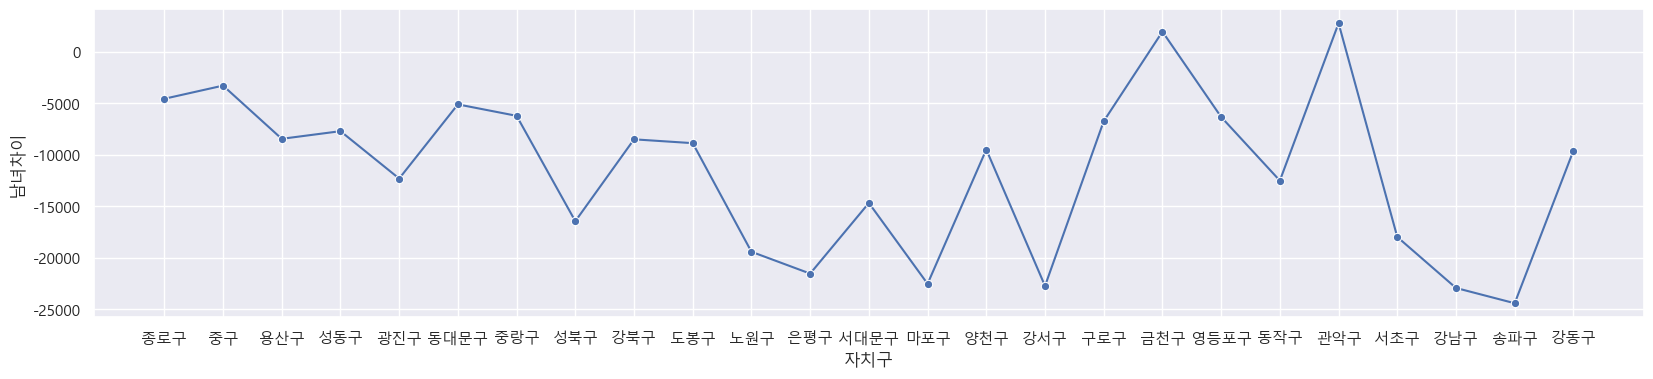

In [109]:
sns.lineplot(data = seoul_people, marker = 'o', x= '자치구', y='남녀차이')

<AxesSubplot:xlabel='자치구', ylabel='65세이상고령인'>

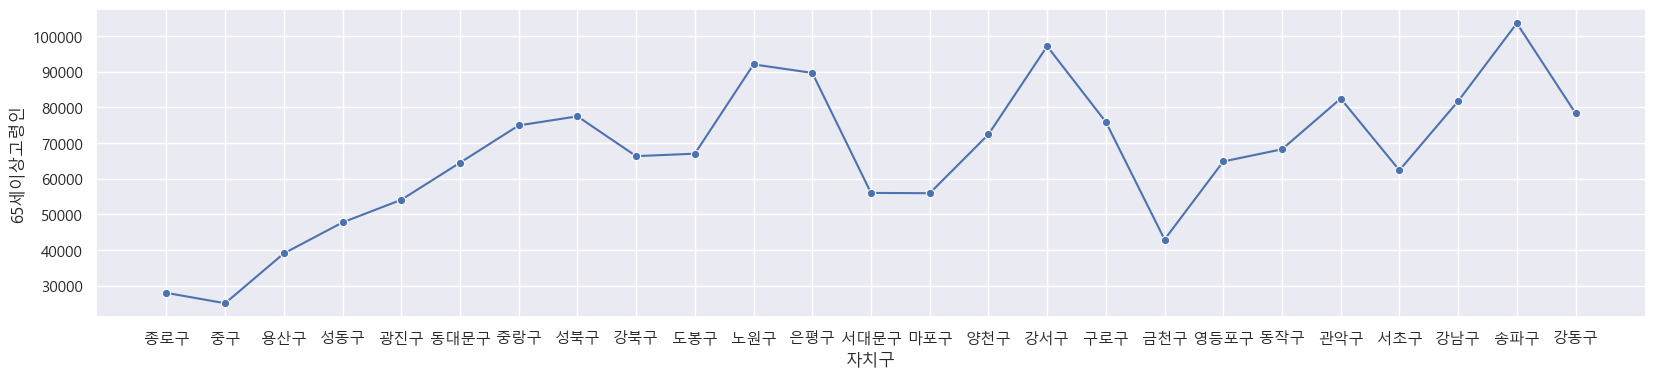

In [110]:
sns.lineplot(data = seoul_people,  marker = 'o',x= '자치구', y='65세이상고령인')

In [104]:
# 위 차트들을 통해 알게된 사실을 정리해봅시다.

# 1. 남 녀의 총합은 9428372이다.

# 2. 금천구 / 서초구의 경우 남자가 여자보다 많았으며, 송파구의 경우 여자와 남자의 차이가 가장 많이 나는 것으로 파악된다.

# 3. 65세이상고령인의 경우 중구에서 가장 적었으며, 송파구에서 가장 많았다.